Кластеризація клієнтів на нових та старих

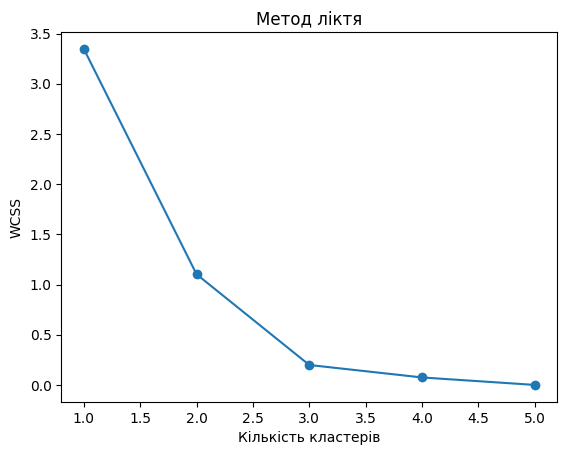

  Client First_Order Last_Order  Orders  Avg_Check  Client_Age  Activity  \
0      A  2024-01-01 2024-12-15       5        100         371       349   
1      B  2023-06-01 2024-12-10      15         50         585       558   
2      C  2024-11-01 2024-12-01       3        120          66        30   
3      D  2023-01-15 2024-10-15      20         40         722       639   
4      E  2024-02-01 2024-12-05       2        150         340       308   

   Order_Frequency  Cluster  
0         0.014327        1  
1         0.026882        0  
2         0.100000        2  
3         0.031299        0  
4         0.006494        1  


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. Завантаження даних
data = pd.DataFrame({
    'Client': ['A', 'B', 'C', 'D', 'E'],
    'First_Order': ['2024-01-01', '2023-06-01', '2024-11-01', '2023-01-15', '2024-02-01'],
    'Last_Order': ['2024-12-15', '2024-12-10', '2024-12-01', '2024-10-15', '2024-12-05'],
    'Orders': [5, 15, 3, 20, 2],
    'Avg_Check': [100, 50, 120, 40, 150]
})

# 2. Обчислення додаткових метрик
data['First_Order'] = pd.to_datetime(data['First_Order'])
data['Last_Order'] = pd.to_datetime(data['Last_Order'])
data['Client_Age'] = (pd.to_datetime('today') - data['First_Order']).dt.days
data['Activity'] = (data['Last_Order'] - data['First_Order']).dt.days
data['Order_Frequency'] = data['Orders'] / data['Activity']

# 3. Масштабування даних
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Client_Age', 'Activity', 'Orders', 'Avg_Check', 'Order_Frequency']])

# 4. Обчислення WCSS з урахуванням кількості клієнтів
wcss = []
max_clusters = min(10, len(data))  # Максимум кластерів дорівнює кількості клієнтів
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# 5. Побудова графіка
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

# 6. Кластеризація
optimal_k = 3  # Наприклад, з графіка
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

print(data)
